In [7]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# print("Please upload your train.tsv file:")
# uploaded_train = files.upload()

# print("\n\nPlease upload your dev.tsv file:")
# uploaded_dev = files.upload()

# train_filename = list(uploaded_train.keys())[0]
# train_content = io.BytesIO(uploaded_train[train_filename])

# dev_filename = list(uploaded_dev.keys())[0]
# dev_content = io.BytesIO(uploaded_dev[dev_filename])
train_content = open('train.tsv', 'r')
dev_content = open('dev.tsv', 'r')


Total number of tweets to analyze: 13240

 Data Analysis Results

1. Class Balance (Distribution of Labels):
label
NOT    8840
OFF    4400
Name: count, dtype: int64

NOT (Not Offensive): 66.77%
OFF (Offensive): 33.23%


2. Hashtag Prevalence:
Number of tweets containing at least one hashtag: 1936
Number of tweets without any hashtags: 11304
Percentage of tweets with hashtags: 14.62%


 Visualizations


/tmp/ipython-input-2088940001.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_balance.index, y=class_balance.values, ax=axes[0], palette=['#66c2a5','#fc8d62'])
/tmp/ipython-input-2088940001.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, ax=axes[1], palette=['#8da0cb','#e78ac3'])
/tmp/ipython-input-2088940001.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Hashtag', 'Has Hashtag'])


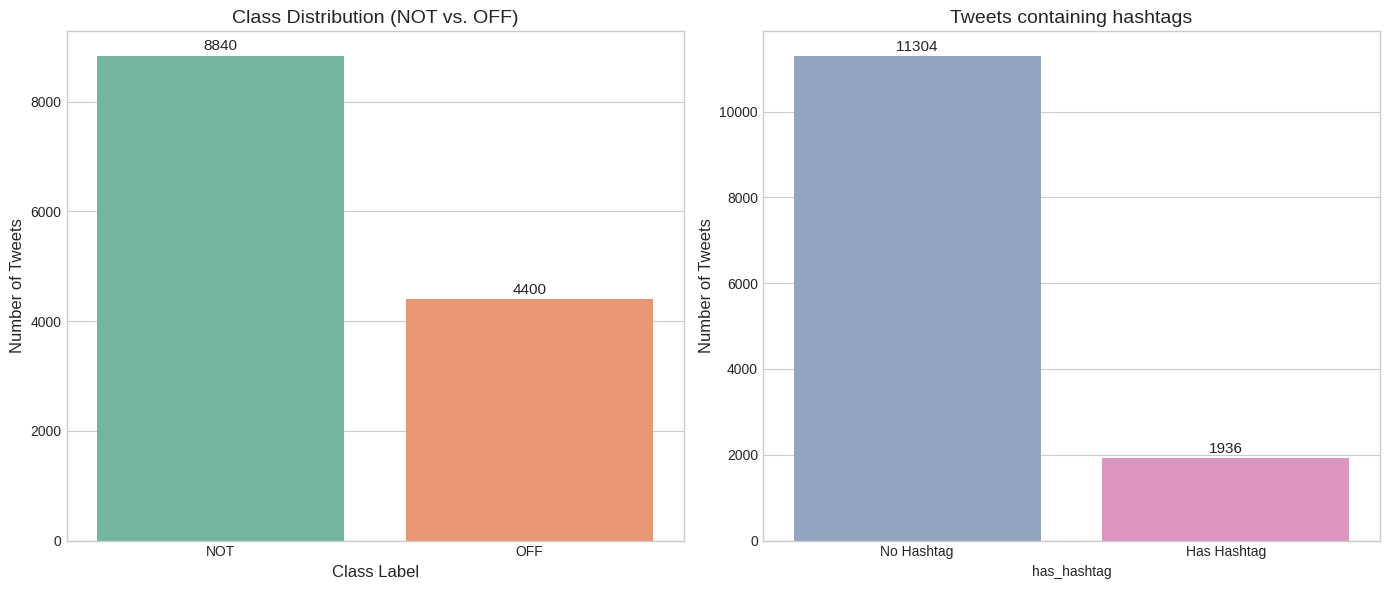

In [8]:
train_dev_columns = ['tweet', 'label']

try:
    train_df = pd.read_csv(train_content, sep='\t', header=None, names=train_dev_columns, on_bad_lines='warn')
    dev_df = pd.read_csv(dev_content, sep='\t', header=None, names=train_dev_columns, on_bad_lines='warn')
    full_df = pd.concat([train_df, dev_df], ignore_index=True)

    print(f"Total number of tweets to analyze: {len(full_df)}")
    print("\n Data Analysis Results")

    print("\n1. Class Balance (Distribution of Labels):")
    class_balance = full_df['label'].value_counts()
    class_balance_percent = full_df['label'].value_counts(normalize=True) * 100

    print(class_balance)
    print(f"\nNOT (Not Offensive): {class_balance_percent.get('NOT', 0):.2f}%")
    print(f"OFF (Offensive): {class_balance_percent.get('OFF', 0):.2f}%")

    print("\n\n2. Hashtag Prevalence:")
    def has_hashtag(tweet):
        return isinstance(tweet, str) and '#' in tweet

    full_df['has_hashtag'] = full_df['tweet'].apply(has_hashtag)
    hashtag_counts = full_df['has_hashtag'].value_counts()

    tweets_with_hashtags = hashtag_counts.get(True, 0)
    tweets_without_hashtags = hashtag_counts.get(False, 0)
    percent_with_hashtags = (tweets_with_hashtags / len(full_df)) * 100

    print(f"Number of tweets containing at least one hashtag: {tweets_with_hashtags}")
    print(f"Number of tweets without any hashtags: {tweets_without_hashtags}")
    print(f"Percentage of tweets with hashtags: {percent_with_hashtags:.2f}%")

    print("\n\n Visualizations")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.barplot(x=class_balance.index, y=class_balance.values, ax=axes[0], palette=['#66c2a5','#fc8d62'])
    axes[0].set_title('Class Distribution (NOT vs. OFF)', fontsize=14)
    axes[0].set_ylabel('Number of Tweets', fontsize=12)
    axes[0].set_xlabel('Class Label', fontsize=12)
    for index, value in enumerate(class_balance):
        axes[0].text(index, value + 100, f"{value}", ha='center', fontsize=11)

    sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values, ax=axes[1], palette=['#8da0cb','#e78ac3'])
    axes[1].set_title('Tweets containing hashtags', fontsize=14)
    axes[1].set_ylabel('Number of Tweets', fontsize=12)
    axes[1].set_xticklabels(['No Hashtag', 'Has Hashtag'])
    hashtag_percentages = (hashtag_counts / len(full_df)) * 100
    for index, value in enumerate(hashtag_counts):
        axes[1].text(index, value + 100, f"{value}", ha='center', fontsize=11)


    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred: {e}")
    print("Please make sure you have uploaded the correct TSV files and that they are not corrupted.")